# LetsGrowMoreVIP - Data Science Internship
## intermediate level task-7 A Neural Network That Can Read Handwriting
# Author - Pawan suthar

#### Importing packages

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### loading dataset

In [ ]:

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


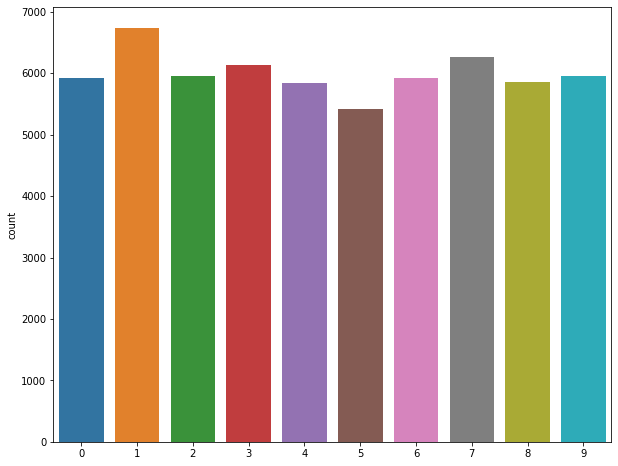

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

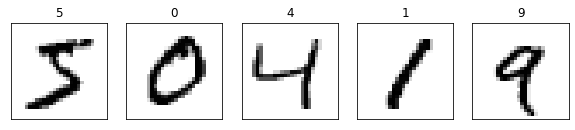

In [ ]:
#Dataset properties
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

#### Pre-processing the data

In [ ]:

print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [22]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, )
x_test = x_test.reshape(x_test.shape[0], 28, 28, )
input_shape = (28, 28, )

#### applying normalization

In [ ]:

x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## Creating the model

### Model Architecture

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

- Conv2D - for the convolution layers
- Dropout - to prevent overfitting
- Dense - a fully connected layer 
- Softmax activation - This is used to convert all predictions into probability

The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

**CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


In [ ]:

model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

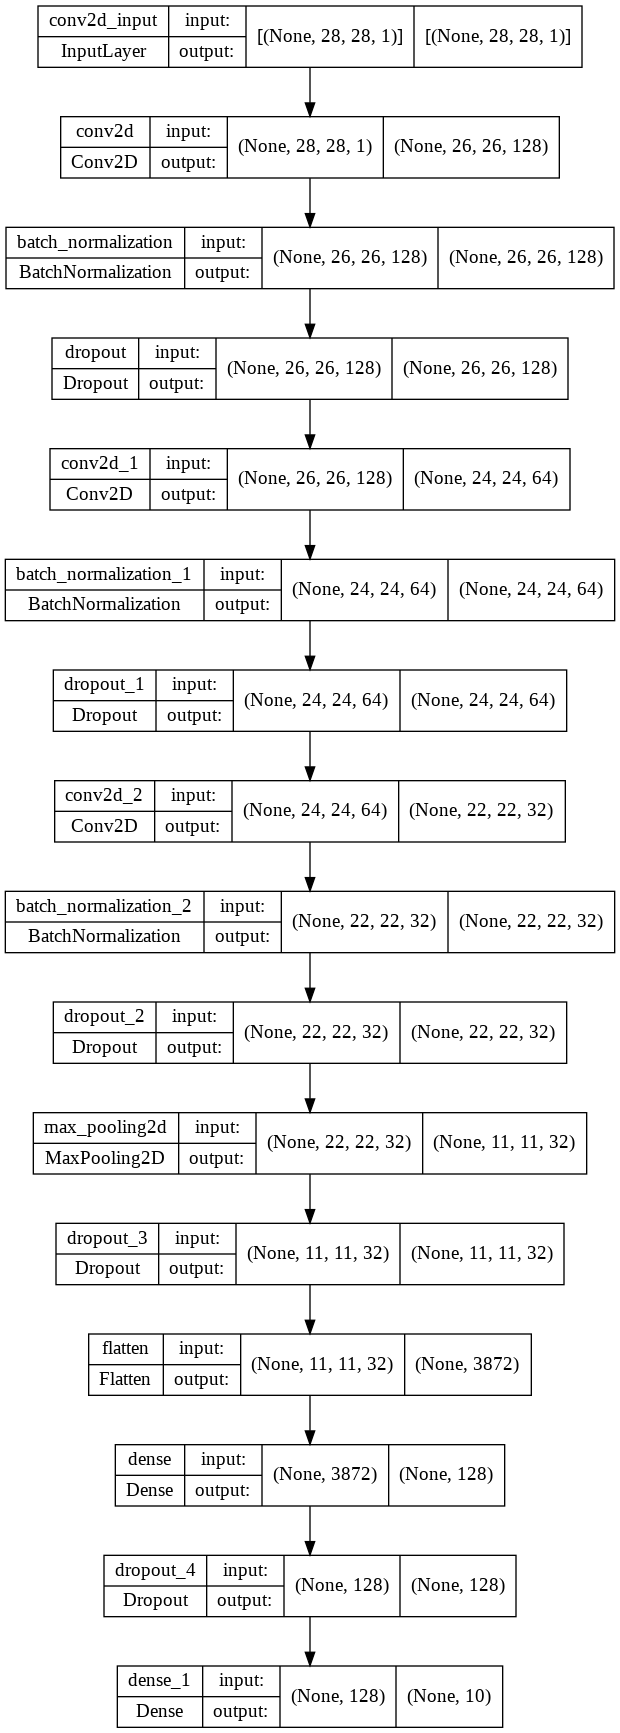

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

#### Train the model

In [13]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 606s 358ms/step - loss: 0.2785 - accuracy: 0.9169 - val_loss: 0.0866 - val_accuracy: 0.9788
Epoch 2/10
1688/1688 [==============================] - 605s 358ms/step - loss: 0.1129 - accuracy: 0.9668 - val_loss: 0.1103 - val_accuracy: 0.9797
Epoch 3/10
1688/1688 [==============================] - 594s 352ms/step - loss: 0.0904 - accuracy: 0.9745 - val_loss: 0.0877 - val_accuracy: 0.9845
Epoch 4/10
1688/1688 [==============================] - 592s 351ms/step - loss: 0.0750 - accuracy: 0.9770 - val_loss: 0.1162 - val_accuracy: 0.9835
Epoch 5/10
1688/1688 [==============================] - 597s 354ms/step - loss: 0.0675 - accuracy: 0.9801 - val_loss: 0.1334 - val_accuracy: 0.9810
Epoch 6/10
1688/1688 [==============================] - 594s 352ms/step - loss: 0.0584 - accuracy: 0.9829 - val_loss: 0.2882 - val_accuracy: 0.9665
Epoch 7/10
1688/1688 [==============================] - 596s 353ms/step - loss: 0.0560 - accuracy: 0.9836 - val_

In [14]:
model.save('project.h5')

In [15]:
from tensorflow.keras.models import load_model
model = load_model('project.h5')

#### Evaluate the model

In [16]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 26s 83ms/step - loss: 2.7744 - accuracy: 0.9888
Test Loss 2.7743968963623047
Test Accuracy 0.9887999892234802


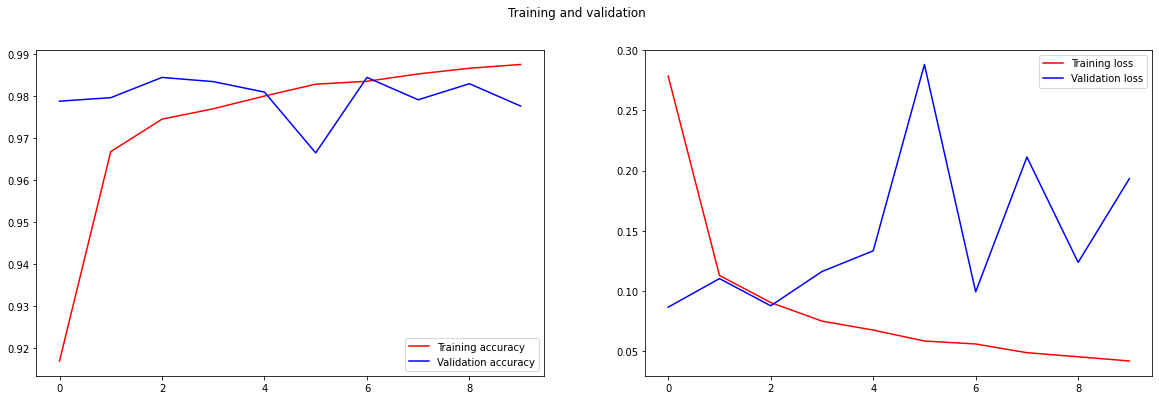

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

####  Confusion Matrix

In [18]:

y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    2,    0,    0,    1,    0,    0],
       [   0, 1133,    1,    0,    1,    0,    0,    0,    0,    0],
       [   1,    3, 1023,    0,    3,    0,    0,    2,    0,    0],
       [   0,    0,    9,  990,    0,    6,    0,    3,    1,    1],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   2,    0,    0,    0,    0,  883,    4,    1,    0,    2],
       [   3,    2,    0,    0,    2,    1,  950,    0,    0,    0],
       [   0,    0,    7,    0,    4,    0,    0, 1015,    1,    1],
       [   8,    1,    4,    3,    1,    2,    6,    1,  944,    4],
       [   1,    0,    0,    0,   12,    1,    0,    1,    2,  992]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

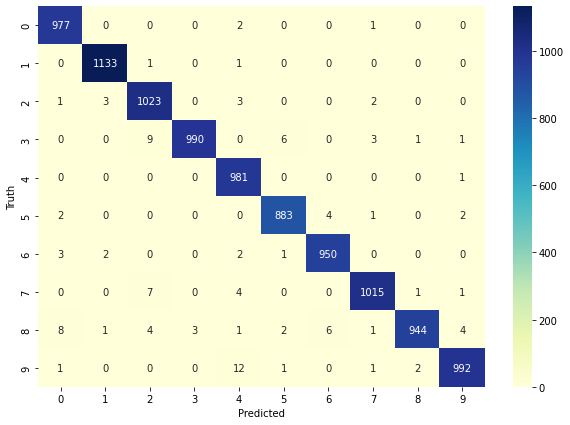

In [19]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Testing the Model

Predicted Value:  7
Successful prediction


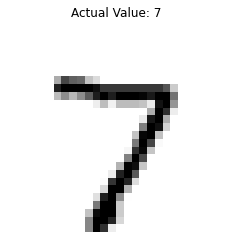

In [24]:

plt.imshow(x_test[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(y_test[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


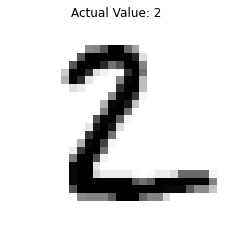

In [25]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')